<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/CLUSTERING/ejercicio_comparativas/Santiago_Ruiz_km_Agg_Gmm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

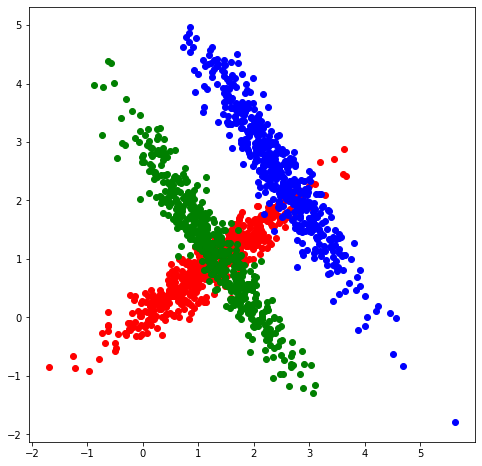

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import mixture
from sklearn.cluster import AgglomerativeClustering

n_samples = 1500
centers = [(1, 1), (6,6),(12,12)]
random_state = 170

X, y = make_blobs(n_samples=n_samples, centers=centers,random_state=random_state)
Xa=X[y==0]
Xb=X[y==1]
Xc=X[y==2]

transformation1 = [[0.50834549, 0.53667341], [0.70887718, 0.35253229]]
Xa_aniso = np.dot(Xa, transformation1)

transformation2 = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
Xb_aniso = np.dot(Xb, transformation2)

transformation3 = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
Xc_aniso = np.dot(Xc, transformation3)
fig = plt.figure(figsize=(8, 8))
plt.scatter(Xa_aniso[:, 0], Xa_aniso[:, 1], c='r')
plt.scatter(Xb_aniso[:, 0], Xb_aniso[:, 1], c='g')
plt.scatter(Xc_aniso[:, 0], Xc_aniso[:, 1], c='b')
plt.show()


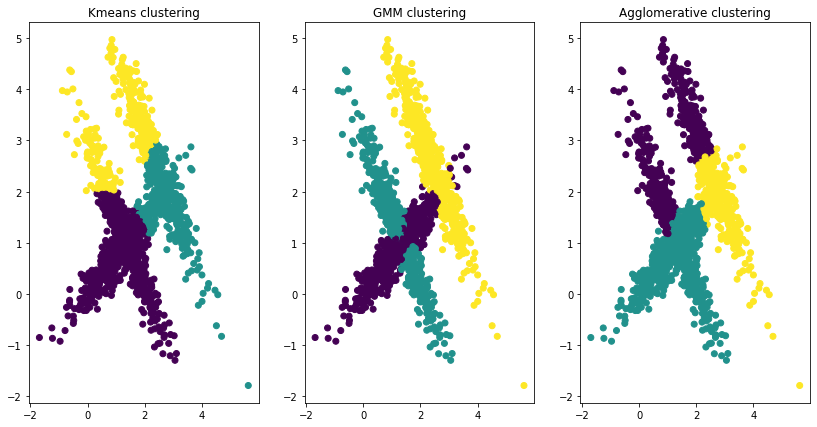

In [71]:
X2_aniso=np.append(Xa_aniso,np.append(Xb_aniso,Xc_aniso,axis = 0),axis = 0)
#kmeans
Kmeans = KMeans(n_clusters=3, random_state=random_state).fit_predict(X2_aniso)
#agglomerative
Agg_clust = AgglomerativeClustering(n_clusters=3).fit_predict(X2_aniso)
#gmm
clust_gmm = mixture.GaussianMixture(n_components=3,covariance_type='full').fit_predict(X2_aniso)

plt.figure(figsize=(14,7))
ax0 = plt.subplot(1,3,1)
plt.scatter(X2_aniso[:, 0], X2_aniso[:, 1], c=Kmeans)
plt.title("Kmeans clustering")

ax1 = plt.subplot(1,3,2)
plt.scatter(X2_aniso[:, 0], X2_aniso[:, 1], c=clust_gmm)
plt.title("GMM clustering")

ax2 = plt.subplot(1,3,3)
plt.scatter(X2_aniso[:, 0], X2_aniso[:, 1], c=Agg_clust)
plt.title("Agglomerative clustering")
plt.show()


